# Machine Learning for Everybody

[Course Link](https://www.youtube.com/watch?v=i_LwzRVP7bg)

[MAGIC Gamma Telescope Data](https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope)

[Seoul Bike Sharing Data](https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand)

## Imports

In [190]:
# Imports
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

import tensorflow as tf

## Intro to ML

### Types of learning

- Supervised learning: Labelled inputs are used to learn outputs.

- Unsupervised learning: Unlabelled inputs are used to identify patterns in data.

- Reinforcement learning: A model or agent learns in an interactive environment based on rewards and penalties.

### Types of features

- Features can be quantitative or qualitative:

**Qualitative**

- Nominal categorical data (e.g. country of origin) has no inherent order, and can undergo one-hot encoding i.e. one category value is defined as $1$ and all others as $0$.
- Ordinal categorical data (e.g. age group) has an inherent order, and can be assigned an appropriate integer value.

**Quantitative**
- Numerical valued data (discrete or continuous).

The list of features and values passed to an ML model is the **feature vector**.

### Supervised Learning

- Classification: Predict discrete classes, can be binary or multi-class.

- Regression: Predict continuous values e.g. future temperature/prices.

### Loss Functions

- Loss is the numerical metric defining the difference between a given prediction and a known 
label.

**L1 Loss**
$$ 
L1 = \sum^{n}_{i=1}|Y - \hat{Y}|
$$

- Takes the absolute value of your known label ($Y$), and subtracts the value of the predicted label ($\hat{Y}$).
- The further the prediction, the greater the loss.
- Taking the average of various L1 loss values gives you the **Mean Absolute Error**

**L2 Loss**
$$
L2 = \sum^{n}_{i=1}(Y - \hat{Y})^2
$$

- A quadratic function, so small differences have much lower relative loss than larger differences.
- Taking the average of various L2 loss values gives you the **Mean Squared Error**

**Binary Cross-Entropy Loss**
$$
BCE = \frac{1}{n}\sum^{n}_{i=1}(Y_i \cdot log\hat{Y_i} + (1 - Y_i) \cdot log(1 - \hat{Y_i}))
$$

- Loss calculation used for binary classification
- Loss decreases as performance improves

### Accuracy Metrics

- Measures the % correct labels as an indication of overall model performance.

## MAGIC Gamma Telescope Data

### Import data

In [3]:
# Define columns
list_cols = [
    'fLength', 'fWidth', 'fSize', 
    'fConc', 'fConc1', 'fAsym', 
    'fM3Long', 'fM3Trans', 'fAlpha', 
    'fDist', 'class'
]

# Import data
df = pd.read_csv('magic04.data', names = list_cols)

# Show data
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


### Encode data

The `class` column contains two distinct variables:

In [4]:
print(pd.unique(df['class']))

['g' 'h']


These can be easily converted into integers using an `.astype()` command, where $g = 1$ and $h = 0$

In [5]:
# Encode data
df['class'] = (df['class'] == 'g').astype(int)
# Report
print(pd.unique(df['class']))
# Show data
df.head()

[1 0]


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


### Visualise

In [ ]:
# Iterate through feature columns
for feature in list_cols[:-1]:
    # Set title
    plt.title(f'{feature}')
    
    # Plot data
    plt.hist(df[df['class'] == 1][feature], color = 'dodgerblue', label = 'gamma', alpha = 0.7, density = True)
    plt.hist(df[df['class'] == 0][feature], color = 'indianred', label = 'hadron', alpha = 0.7, density = True)
    # Set ylabel based on density
    plt.ylabel('Probability')
    plt.xlabel(feature)
    plt.legend()
    
    # Show plot
    plt.show()

### Split data

- Training data is used to train the model, and iterative loss is used to alter parameters.

- Validation data is passed to the model to generate iterative loss values that are NOT fed back into the model.

- Test data is used to test generalisability on previously unseen data.

Below, the `.sample()` function is used to shuffle and randomly sample data. 60% of the length of the dataframe is used for training, 20% for validation and 20% for testing.

In [7]:
# Shuffle indices of dataframe
shuffled_index = df.sample(frac = 1).index

# Define split points
train_end = int(0.6 * len(df))
valid_end = int(0.8 * len(df))

# Create splits
train = df.loc[shuffled_index[:train_end]]
valid = df.loc[shuffled_index[train_end:valid_end]]
test = df.loc[shuffled_index[valid_end:]]

### Scale data

Given that feature columns may vary in absolute numerical value, their value can be scaled to the mean/SD of the column to normalise across the dataset. This can be achieved with a custom `scale_dataset` function.

#### Oversampling

- There is a difference in the gamma/hadron labelled data in the training set:

In [8]:
print('Gamma:', len(train[train['class'] == 1]))
print('Hadron:', len(train[train['class'] == 0]))

Gamma: 7385
Hadron: 4027


It would be best to ensure that training attempts to equally sample instances of both classes. This can be achieved by adding `imblearn.over_sampling.RandomOverSampler`:

In [9]:
def scale_dataset(dataframe, oversample = False):
    # Extract all but last column (assuming label column is the final column)
    X = dataframe[dataframe.columns[:-1]].values
    # Extract label column
    Y = dataframe[dataframe.columns[-1]].values

    # Initialise sklearn StandardScaler
    scaler = StandardScaler()

    # Fit and transform X
    X = scaler.fit_transform(X)

    # Check oversample parameter
    if oversample:
        ros = RandomOverSampler()
        X, Y = ros.fit_resample(X, Y)

    # Reshape Y to 2 dimensions to be rejoined (use -1 for inferred reshaping)
    Y_reshape = np.reshape(Y, (-1, 1))

    # Rejoin X and Y data (Y must be reshaped from 1 dimension to 2 dimensional)
    data = np.hstack((X, Y_reshape))

    return data, X, Y

In [10]:
# Apply data scaling
train, X_train, Y_train = scale_dataset(train, oversample = True)

# Check number of class entries in training dataset
print('Gamma:', sum(Y_train == 1))
print('Hadron:', sum(Y_train == 0))

Gamma: 7385
Hadron: 7385


Validation and testing datasets do NOT need oversampling as they represent unseen data which will not necessarily adhere to even splits between classes.

In [11]:
# Generate validation data
valid, X_valid, Y_valid = scale_dataset(valid, oversample = False)
# Generate testing data
test, X_test, Y_test = scale_dataset(test, oversample = False)

## Classification Models

### K-Nearest Neighbours

An datapoint is assigned an output label based on the majority label of its nearest neighbours. This requires some distance function to measure the distance between points.

In 2D space, Euclidean distance is often used:
$$
distance = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}
$$

The distance function used can be expanded into $n$ dimensions where $n$ is the number of relevant features.

The $k$ defines how many neighbours are used to produce this output, often 3-5.

In [12]:
# Initialise model
knn_model = KNeighborsClassifier(n_neighbors = 5)
# Fit model to training data
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [13]:
# Generate predictions for testing data
Y_pred = knn_model.predict(X_test)

# Classification report for Y_pred vs Y_test
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1346
           1       0.86      0.87      0.86      2458

    accuracy                           0.82      3804
   macro avg       0.81      0.81      0.81      3804
weighted avg       0.82      0.82      0.82      3804



The classification report returns:

- Accuracy of 82%.
- Precision (% of returned positives are known positives) of 77-85%
- Recall (% of known positives given correct label) of 73-88%
- F1 score is a mixture of precision and recall (can be used if using an unbalanced test dataset)

### Naive Bayes

This model is based on conditional probability and Bayes' Rule. 

An example table is provided, showing those **testing** positive (+) or negative (-) for COVID, and whether they **really** have the disease (Y) or not (N). Totals for rows and columns are shown.


|     |   +  |   -  |       |
|-----|------|------|-------|
| Y   | 531  | 6    | 537   |
| N   | 20   | 9443 | 9463  |
|     | 551  | 9449 |       |

_What is the probability of having COVID, given a positive test?_

This probability is expressed as:

$P(covid | test+) = 531 / 551 \approx 96.4\%$

#### **Bayes' Rule**

What is the probability of an event $A$ given a condition $B$?

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

For a given disease:

- $P(false +) = 0.05$
- $P(false -) = 0.01$
- $P(disease) = 0.1$ (therefore $P(clear) = 0.9$)

What is $P(disease|test+)$?

The given values provide the following grid:

|     |   +  |   -  |
|-----|------|------|
| disease   |   | 0.01    |
| clear   | 0.05   |  |


The row-based probability must equal 1, therefore the grid becomes:

|     |   +  |   -  |
|-----|------|------|
| disease   | **0.99**  | 0.01    |
| clear   | 0.05   | **0.95** |

Applying Bayes' Rule:
$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$
$$
P(disease|+) = \frac{P(+|disease) \cdot P(disease)}{P(+)}
$$
$$
P(A|B) = \frac{0.99 \cdot 0.1}{P(+)}
$$

A positive test $P(+)$ can occur when you have disease AND when you're clear. This can be expressed as:

$$
P(+) = P(+|disease) \cdot P(disease) + P(+|clear) \cdot P(clear)
$$
$$
P(+) = 0.99 \cdot 0.1 + 0.05 \cdot 0.9
$$

Therefore, the final formulation can be calculated as:
$$
P(A|B) = \frac{0.99 \cdot 0.1}{0.99 \cdot 0.1 + 0.05 \cdot 0.9} = 0.6875 \space \text{or} \space 68.75\%
$$

#### **Bayes' Rule in Classification**

How does Bayes' Rule calculate the probability of a particular category?

$$
P(C_k|x) = \frac{P(x|C_k) \cdot P(C_k)}{P(x)}
$$

where:

- $C_k$ is a category within $k$ categories ($C_1, ..., C_k$)
- $x$ is a feature vector
<br>
<br>

- $P(C_k|x)$ is the **posterior** i.e. the probability of the feature vector (sample) belonging to a category
- $P(x|C_k)$ is the **likelihood** i.e. assuming the particular category, what is the likelihood of seeing the feature vector?
- $P(C_k)$ is the **prior** i.e. what is the probability of this category in general across the dataset?
- $P(x)$ is the **evidence** i.e. the probability of x, which is evidence used to change the posterior probability

#### **Naive Bayes Formula**

What is the Naive Bayes formula and how do we derive it?

$$
P(C_k | x_1, ..., x_n) \space \propto \space P(C_k) \prod^n_{i=1} P(x_i|C_k)
$$

**Derivation**

Using Bayes' Rule for the initial probability i.e. $P(C_k | x_1, ..., x_n)$, or what is the probability that we are in some category $C_k$ given some feature vector of values ($x_1, ..., x_n$)?

$$
P(C_k | x_1, ..., x_n) = \frac{P(x_1, ..., x_n | C_k) \cdot P(C_k)}{P(x_1, ..., x_n)}
$$

The evidence/denominator, $P(x_1, ..., x_n)$ will be constant for all classes, therefore can be simplified out of the equation:

$$
P(C_k | x_1, ..., x_n) \space \propto \space P(x_1, ..., x_n | C_k) \cdot P(C_k)
$$

The 'naiveity' of Naive Bayes is the assumption that all entries of the feature vector are **independent**.
This means their individual probabilities can be multiplied, converting the likelihood into the following:

$$
P(x_1, ..., x_n | C_k) = P(x_1|C_k) \cdot P(x_2|C_k) \cdot ... \cdot P(x_n|C_k)
$$
otherwise expressed as:
$$
P(x_1, ..., x_n | C_k) = \prod^n_{i=1}P(x_i|C_k)
$$

Using this representation of the likelihood, multiplying it by the prior generates the Naive Bayes formula:
$$
P(C_k | x_1, ..., x_n) \space \propto \space P(C_k) \prod^n_{i=1} P(x_i|C_k)
$$

#### **Predicted Category**

What is the algorithm used to predict a category using Naive Bayes?

The predicted category $\hat{Y}$ of a feature vector is derived using:
$$
\hat{Y} = \underset{k \in {1,k}}{\arg\max} \space \space P(C_k | x_1, ..., x_n)
$$
which using Naive Bayes is proportional to, and written as:
$$
\hat{Y} = \underset{k \in {1,k}}{\arg\max} \space \space P(C_k) \prod^n_{i=1} P(x_i|C_k)
$$

This iterates through all categories, calculates relevant probability value, and chooses the category that maximises that probability. 

This is known as **Maximum A Posteriori (MAP)** i.e. pick the hypothesis/category ($k$) that is most probable, to minimise probability of misclassification.

#### **Implementing Naive Bayes**

How is Naive Bayes implemented in Python?

In [14]:
# Initialise model
nb_model = GaussianNB()
# Fit model
nb_model = nb_model.fit(X_train, Y_train)
# Generate predictions
Y_pred = nb_model.predict(X_test)
# Report classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.51      1346
           1       0.73      0.90      0.81      2458

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



### Logistic Regression

Here, we are modelling the **probability**, between 0-1, that a feature vector is within a particular category.

- _Linear_ regression uses the formula $\hat{y} = mx + b$, and can project some trend using a sloped line for estimation of continuous values.
- If you adapted to estimating probability i.e. $P = mx + b$, you encounter the problem that $x$, or the feature used to estimate $y$ (or $P$) can be anywhere between $-inf$ and $inf$
- Therefore, you can restrict the value of $P$ by calculating the **odds** i.e.
$$
\frac{P}{1-P} = mx + b
$$

- Still, $mx + b$ could be negative, and so to fix this the log of the odds are taken:
$$
\log \left(\frac{P}{1-P} \right) = mx + b
$$

To solve for $P$, you take the exponent:
$$
\frac{P}{1-P} = e^{mx + b}
$$

Then continue solving for P
$$
P = (1-P) \space e^{mx + b}
$$
$$
P = e^{mx + b} - Pe^{mx + b}
$$
$$
P + Pe^{mx + b} = e^{mx + b}
$$
As both instances of P exist on the same side of the equation, you can use factoring to state that
$$
P + Pe^{mx + b} = P(1 + e^{mx + b})
$$
Therefore:
$$
P(1 + e^{mx + b}) = e^{mx + b}
$$
$$
P = \frac{e^{mx + b}}{1 + e^{mx + b}}
$$

A numerator of 1 is desired, and so the right side is altered using:
$$
P = \frac{e^{mx + b}}{1 + e^{mx + b}} \cdot \frac{e^{-({mx + b})}}{e^{-({mx + b})}}
$$
> The numerator is calculated as so:
> $$
e^{mx + b} \cdot e^{-({mx + b})} = e^{({mx + b}) - ({mx + b})} = e^0 = 1
> $$
> The denominator like so:
> $$
(1 + e^{mx + b}) \cdot e^{-({mx + b})} = 1 \cdot e^{-({mx + b})} + e^{mx + b} \cdot e^{-({mx + b})}
> $$
> Where:
> $$
1 \cdot e^{-({mx + b})} = e^{-({mx + b})}
> $$
> and:
> $$
e^{mx + b} \cdot e^{-({mx + b})} = e^0 = 1
> $$
> which combines to:
> $$
1 + e^{-({mx + b})}
> $$

Written fully:
$$
P = \frac{1}{1 + e^{-({mx + b})}}
$$

Which is a form of a the **sigmoid** function, often expressed as:
$$
S(x) = \frac{1}{1 + e^{-x}}
$$
Here, the $x$ can be substituted for $mx + b$ to give the function we derived:
$$
S(mx + b) = \frac{1}{1 + e^{-({mx + b})}}
$$

Logistic regression is therefore an attempt to fit data to a sigmoid function, to allow for prediction of categories.

With only one feature $x$, this is **simple logistic regression**, and with $x_1, ..., x_n$ it's called **multiple logistic regression**

#### **Implementing Logistic Regression**

How do we implement Logistic Regression in Python?

The `LogisticRegression()` function from `sklearn` has multiple parameters to test for best results, including the `penalty` parameter i.e. loss, which by default uses the `l2` loss function that harshly penalises outlier values.

In [15]:
# Initialise model
lg_model = LogisticRegression()
# Fit model
lg_model = lg_model.fit(X_train, Y_train)
# Generate predictions
Y_pred = lg_model.predict(X_test)
# Report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1346
           1       0.84      0.83      0.83      2458

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



This performs better than Naive Bayes but not as good as KNN.

### Support Vector Machines (SVMs)

Given data with $n$ features e.g. $x_0$ and $x_1$, where two distinct labelled groups are formed, SVMs attempt to generate the best $n$-dimensional delineation between these two groups, to best classify novel data into the known groups.

_What is the hyperplane that best differentiates between categories?_

- Beyond separating classes, we also pay attention to the **margin** given by the hyperplane and the nearest points in the defined categories.

- We want the hyperplane that best separates classes **and** generates the largest margins.

- The data points from the classes that define the margins around the line are the **support vectors**.

- SVMs are very sensitive to outliers, as these can drastically alter the direction of the hyperplane.

- The **kernel trick** can be used to convert one of more features of the data to allow for easier separation of datapoints between classes, to then run an SVM.

#### **Implementing SVM**

Implementing an SVM using the Support Vector Classifier (`SVC`) from `sklearn`.

In [16]:
# Initialise model
svm_model = SVC()
# Fit model
svm_model = svm_model.fit(X_train, Y_train)
# Generate predictions
Y_pred = svm_model.predict(X_test)
# Report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1346
           1       0.89      0.90      0.89      2458

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



### Neural Networks

A neural net generally contains an input layer, where feature values are inputed, connected to some number of hidden layers and an output layer.

The feature values are each multiplied by some weight, and the sum of the weighted values all enter one of the neurons in the hidden layer. These are then modulated by some bias term, and the overall neuron calculation is passed to an activation function, which generates the final output.

#### **Activation functions**

What kinds of functions are used to manage the linear combination of values in a NN?

- Activation functions include non-linear functions such as:

- Sigmoid ($0 - 1$)
- Tanh ($-1 - 1$)
- RELU (any output value < 0 = 0, anything > 0 increases linearly)

- Each neuron therefore outputs a non-linear combination of its previous inputs.

#### **Training NNs**

How are NNs adjusted during training?

**Backpropagation**

- Consider the quadratic L2 loss function, where outliers generate incredibly high error values.
- The goal is to maximally decrease loss.
- Given that the loss function forms a gradient, you can use **gradient descent** to reduce the loss between predicted and real values.
- The slope of the gradient and the associated loss values of the predicted output, can change based on whatever weights are assigned to the connections between nodes.
- The NN weights are therefore constantly updated, to attempt to reduce the loss as much as possible.
- The updates are taken in a direction 'down' the gradient towards the lowest loss, and the size of the updates, or the distance travelled down the gradient is denoted by some factor ($\alpha$) which is called the **learning rate**
- The learning rate adjusts how large/how quickly steps are taken to alter weight values to recalculate loss and let the NN come to a final output

#### **Implementing NNs**

How can `TensorFlow` be used to generate NNs?

In [19]:
# Initialise model
nn_model = tf.keras.Sequential([
    # Fully connected, 32 node layer, ReLu activate
    tf.keras.layers.Dense(32, activation = 'relu', input_shape = (10,)),
    # Second dense layer
    tf.keras.layers.Dense(32, activation = 'relu'),
    # Output layer, sigmoid function rounds output to 0/1 for classification
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile optimiser
nn_model.compile(
    # Select optimiser
    optimizer = tf.keras.optimizers.Adam(
        # Set learning rate
        learning_rate = 0.001),
    # Define loss function
    loss = 'binary_crossentropy',
    # Add accuracy metric to visualise later
    metrics = ['accuracy']
)

In [29]:
# Define plotting functions for epoch visualisations
def plot_loss(history):
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label = 'validation_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label = 'accuracy')
    plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [22]:
# Train model
history = nn_model.fit(
    X_train, Y_train,
    epochs = 100,  batch_size = 32, validation_split = 0.2, verbose = 0
)

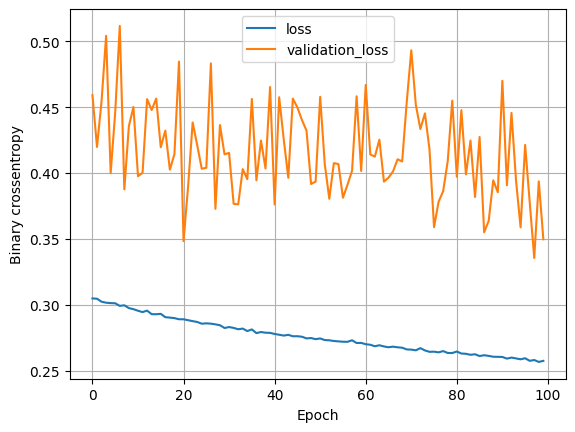

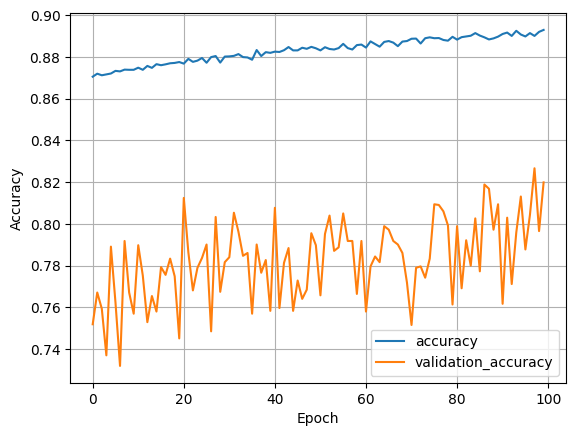

In [30]:
# Plot loss
plot_loss(history)
plot_accuracy(history)

#### **Editing Hyperparameters**

How can we implement a way of iterating through hyperparameter values to find the best set?

In [41]:
# Define a training function
def train_model(X_train, Y_train, num_nodes, dropout_prob, learning_rate, batch_size, num_epochs):
    nn_model = tf.keras.Sequential([
        # Fully connected, n node layer, ReLu activate
        tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape = (10,)),
        # Dropout layer, randomly chooses some nodes to not alter, prevents overfitting
        tf.keras.layers.Dropout(dropout_prob),
        # Second dense layer
        tf.keras.layers.Dense(num_nodes, activation = 'relu'),
        tf.keras.layers.Dropout(dropout_prob),
        # Output layer, sigmoid function rounds output to 0/1 for classification
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])

    # Compile optimiser
    nn_model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
        loss = 'binary_crossentropy',
        metrics = ['accuracy']             
    )
    
    # Train model
    history = nn_model.fit(
        X_train, Y_train, 
        epochs = num_epochs, batch_size = batch_size,
        # Passes previous validation data for evaluation
        validation_data = (X_valid, Y_valid),
        verbose = 0
    )

    return nn_model, history

In [42]:
# Define history plotting functions for epoch visualisations

def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
    ax1.plot(history.history['loss'], label = 'loss')
    ax1.plot(history.history['val_loss'], label = 'validation_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label = 'accuracy')
    ax2.plot(history.history['val_accuracy'], label = 'validation_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()

In [ ]:
# Initialise model with least loss
least_loss_model = None
# Initialise validation loss value for least loss model
least_val_loss = float('inf')

# Define variables
epochs = 100
# Iterate through variables
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for learning_rate in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                # Print variables
                print(f'Num_nodes: {num_nodes}, Dropout Probability: {dropout_prob}, Learning Rate: {learning_rate}, Batch Size: {batch_size}')
                # Train model
                model, history = train_model(X_train, Y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs)
                # Plot loss/accuracy
                plot_history(history)
                # Get final validation loss
                final_val_loss = history.history['val_loss'][-1]
                # Check if validation evaluation is better than current least_val_loss
                if final_val_loss < least_val_loss:
                    # If so, replace current least_val_loss
                    least_val_loss = final_val_loss
                    # Set least loss model
                    least_loss_model = model

In [51]:
# Generate predictions using the best model
Y_pred = least_loss_model.predict(X_test)
# Cast predictions > 0.5 to 1 and all others to 0
Y_pred = (Y_pred > 0.5).astype(int)
# Reshape to one dimension
Y_pred = Y_pred.reshape(-1)
# Report
print(classification_report(Y_test, Y_pred))

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1346
           1       0.90      0.93      0.91      2458

    accuracy                           0.88      3804
   macro avg       0.88      0.86      0.87      3804
weighted avg       0.88      0.88      0.88      3804



## Seoul Bike Sharing Data

In [74]:
# Import data
df = pd.read_csv('SeoulBikeData.csv', encoding = 'latin1')
# Define columns
cols = ['date', 'bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp', 'radiation', 'rain', 'snow', 'season', 'holiday', 'functional']
# Show data
df.columns = cols
# Define relevant data
cols = ['bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp', 'radiation', 'rain', 'snow', 'functional']
# Extract data
df = df[cols]
# Convert text column to integers (0 = No/1 = Yes)
df['functional'] = (df['functional'] == 'Yes').astype(int)
# Extract midday data
df = df[df['hour'] == 12]
# Drop hour column
df.drop(columns = {'hour'}, inplace = True)
# Show data
df.head() 

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


### Visualise

In [ ]:
# Separate feature columns
for column in df.columns[1:]:
    plt.scatter(df[column], df['bike_count'])
    plt.title(column)
    plt.ylabel('Bike Count at Noon')
    plt.xlabel(column)
    plt.show()

In [75]:
# Define apparently non-linear features
non_lin = ['wind', 'visibility', 'functional']
# Drop columns
df.drop(columns = non_lin, inplace = True)
# Show data
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


### Split data

In [76]:
# Shuffle indices of dataframe
shuffled_index = df.sample(frac = 1).index

# Define split points
train_end = int(0.6 * len(df))
valid_end = int(0.8 * len(df))

# Create splits
train = df.loc[shuffled_index[:train_end]]
valid = df.loc[shuffled_index[train_end:valid_end]]
test = df.loc[shuffled_index[valid_end:]]

In [89]:
# Define function to extract X and Y values for a given dataframe
def get_xy(dataframe, y_label, x_labels = None):
    # Copy data
    df = dataframe.copy(deep = True)
    
    # Check for 'None' x_labels
    if x_labels is None:
        # Get all non-y_label column data
        X = df[[column for column in df.columns if column != y_label]].values
    else:
        # Check for one x_label
        if len(x_labels) == 1:
            # Extract column data
            X = df[x_labels[0]].values
            # Reshape to 2D
            X = X.reshape(-1, 1)
        # Case for multiple x_labels
        else:
            X = df[x_labels].values
    
    # Extract y_label data
    y = df[y_label].values
    # Reshape
    y = y.reshape(-1, 1)

    return X, y

In [78]:
# Extract relevant data from datasets for 'temp'
X_train_temp, Y_train_temp = get_xy(train, y_label = 'bike_count', x_labels = ['temp'])
X_valid_temp, Y_valid_temp = get_xy(valid, y_label = 'bike_count', x_labels = ['temp'])
X_test_temp, Y_test_temp = get_xy(test, y_label = 'bike_count', x_labels = ['temp'])

## Regression Models

### Linear Regression

Linear regression attempts to find the line of best fit that models an $xy$ scatterplot of data.

Given a new value of $x$, what would the value of $y$ be?

We are fitting a linear model to data i.e.
$$
y = b_0 + b_1x
$$
where:
- $b_0$ is the $y$-intercept
- $b_1$ is the slope

A data point $y_i$ can be sampled for its distance from the predicted value $\hat{y_i}$, based on the linear model.

The **residual** or error is the absolute difference i.e. $|y_i - \hat{y_i}|$.

The line of best fit attempts to decrease the residuals as much as possible e.g. by decreasing the sum or squared sum of all residuals, where minimising the squared sum adds higher penalties for larger residuals.

$$
\sum_i|y_i - \hat{y_i}| \space or \sum_i|y_i - \hat{y_i}|^2
$$

This is done by altering the $b_0$ and $b_1$ values, and is known as **simple linear regression**.

**Multiple linear regression** will take into account more features and a predictor formula will look like:
$$
y = b_0 + b_1x_1 + ... + b_nx_n
$$

Various assumptions are used in linear regression:

- Linearity: The data follows a linear pattern, there is some **constant** relationship between $x$ and $y$.
- Independence: All samples are independent, and **do not affect** each other.
- Normality: The positive/negative distances of residuals around the line of best fit, when shown in a residual plot, should be **normally distributed**.
- Homoscedasticity: The **variance** of the points in a residual plot should remain the same throughout.

#### **Evaluating Linear Regression**

How do we best measure the effectiveness of a LinReg model?

**Mean Absolute Error (MAE)**

- Sum all residuals, and find the mean distance across the dataset:
$$
\frac{\sum_{i=1}^n|y_i - \hat{y_i}|}{n}
$$
- This can be directly compared to the units of the y axis e.g. error of x dollars or x metres.

**Mean Squared Error (MSE)**
- Square the residuals, sum them, and find the mean:
$$
\frac{\sum_{i=1}^n(y_i - \hat{y_i})^2}{n}
$$
- Punishes large errors in the prediction
- Not directly comparable to units of $y$

**Root Mean Squared Error (RMSE)**
- Square the residuals, sum them, find the mean, then square root:
$$
\sqrt{\frac{\sum_{i=1}^n(y_i - \hat{y_i})^2}{n}}
$$
- The output is then directly comparable to $y$ units.

**Coefficient of Determination ($R^2$)**
$$
R^2 = 1 - \frac{RSS}{TSS}
$$
where:
- $RSS$ = sum of squared residuals i.e. $\sum_{i=1}^n(y_i - \hat{y_i})^2$
- $TSS$ = total sum of squares i.e. $\sum_{i=1}^n(y_i - \bar{y})^2$
    - This determines how far on the $y$ axis all datapoints are from the mean $y$ ($\bar{y}$) value of all datapoints.

- If the line of best fit is better than the TSS, the numerator of $R^2$ will be much smaller, which pushes the output value towards 1

- The **adjusted $R^2$** value accounts for extra terms being added i.e. more $x$ features, as generally adding more features can give a passive increase in effectiveness of predicting $y$.

#### **Simple Linear Regression**

Still using supervised learning, can we predict a particular value, rather than a categorical class?

Here we will run simple linear regression using just the `temp` value to see how well it predicts `bike_count`.

In [87]:
# Initialise regression model
temp_linreg = LinearRegression()
# Fit data
temp_linreg.fit(X_train_temp, Y_train_temp)
# Report
print(f'Coefficient: {temp_linreg.coef_}')
print(f'y-intercept: {temp_linreg.intercept_}')
print(f'Rsquared: {temp_linreg.score(X_test_temp, Y_test_temp)}')

Coefficient: [[20.73700712]]
y-intercept: [385.505325]
Rsquared: 0.3304568611878429


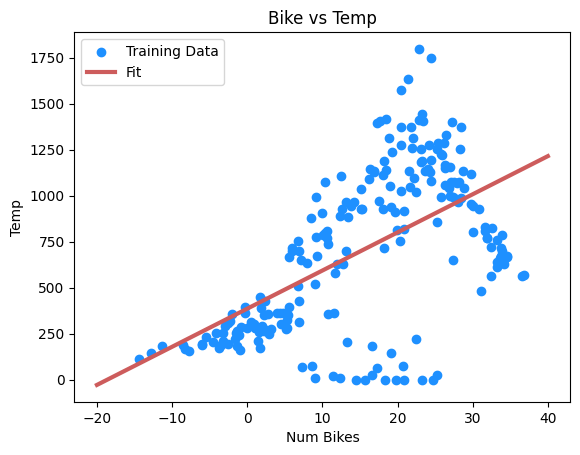

In [88]:
# Plot training data
plt.scatter(X_train_temp, Y_train_temp, label = 'Training Data', color = 'dodgerblue')
# Generate a range of x-values to feed to a model for predicted values
x = tf.linspace(-20, 40, 100)
# Plot the predicted line of best fit
plt.plot(x, temp_linreg.predict(np.array(x).reshape(-1, 1)), label = 'Fit', color = 'indianred', linewidth = 3)

# Format
plt.legend()
plt.title('Bike vs Temp')
plt.ylabel('Temp')
plt.xlabel('Num Bikes')
plt.show()

#### **Multiple Linear Regression**

In [90]:
# Extract relevant data from datasets for 'temp'
X_train_all, Y_train_all = get_xy(train, y_label = 'bike_count')
X_valid_all, Y_valid_all = get_xy(valid, y_label = 'bike_count')
X_test_all, Y_test_all = get_xy(test, y_label = 'bike_count')

In [93]:
# Initialise model
all_linreg = LinearRegression()
# Fit model
all_linreg.fit(X_train_all, Y_train_all)
# Report
print(f'Rsquared: {all_linreg.score(X_test_all, Y_test_all)}')

Rsquared: 0.4427275822717517


#### **Simple Regression w/ Linear Neural Net**

Neural networks are sensitive to normalisation, and a normalisation layer can be built using `tensorflow`.

In [106]:
# Create normalisation layer
temp_normaliser = tf.keras.layers.Normalization(input_shape = (1,), axis = None)
temp_normaliser.adapt(X_train_temp.reshape(-1))

c:\Users\roman\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [107]:
# Initialise a linear neural net model
nn_linreg = tf.keras.Sequential([
    # Pass normaliser layer
    temp_normaliser,
    # Dense layer with one node w/ no activation function (i.e. linear)
    tf.keras.layers.Dense(1)
])

In [108]:
# Compile model
nn_linreg.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.1), loss = 'mean_squared_error')

In [109]:
# Fit model
history = nn_linreg.fit(
    X_train_temp.reshape(-1), Y_train_temp,
    verbose = 0,
    epochs = 1000,
    validation_data = (X_valid_temp, Y_valid_temp)
)

In [110]:
# Define plotting functions for epoch visualisations
def plot_loss_mse(history):
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label = 'validation_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

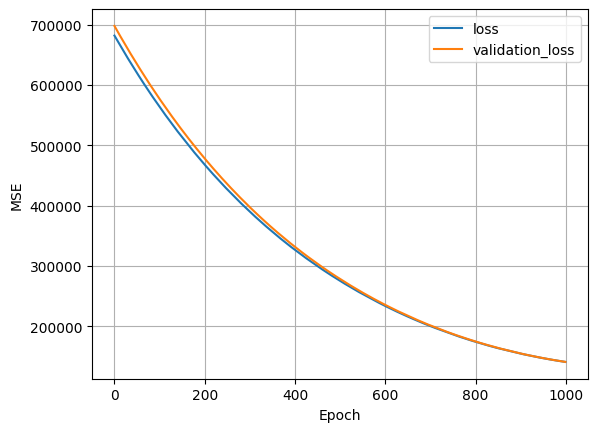

In [111]:
# Plot validation loss
plot_loss_mse(history)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/stepWARNING:tensorflow:5 out of the last 485 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000020138EEA560> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


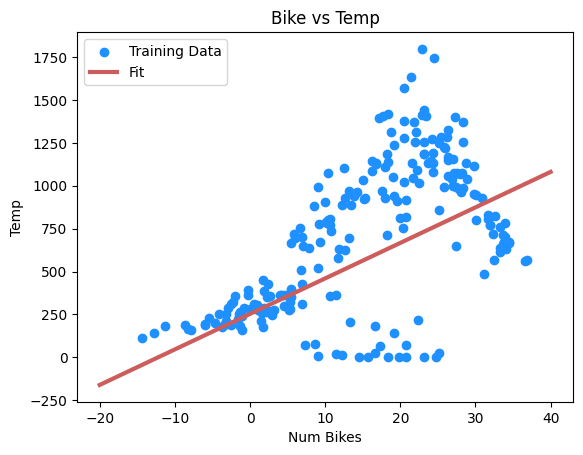

In [112]:
# Plot training data
plt.scatter(X_train_temp, Y_train_temp, label = 'Training Data', color = 'dodgerblue')
# Generate a range of x-values to feed to a model for predicted values
x = tf.linspace(-20, 40, 100)
# Plot the predicted line of best fit
plt.plot(x, nn_linreg.predict(np.array(x).reshape(-1, 1)), label = 'Fit', color = 'indianred', linewidth = 3)

# Format
plt.legend()
plt.title('Bike vs Temp')
plt.ylabel('Temp')
plt.xlabel('Num Bikes')
plt.show()

#### **Simple Regression w/ Full Neural Net**

In [ ]:
# Create normalisation layer
temp_normaliser = tf.keras.layers.Normalization(input_shape = (1,), axis = None)
temp_normaliser.adapt(X_train_temp.reshape(-1))

# Initialise a neural net model
nn_linreg_full = tf.keras.Sequential([
    # Pass normaliser layer
    temp_normaliser,
    # Dense layers
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'relu')
])

# Compile model
nn_linreg_full.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_squared_error')

c:\Users\roman\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [118]:
# Fit model
history = nn_linreg_full.fit(
    X_train_temp, Y_train_temp,
    validation_data = (X_valid_temp, Y_valid_temp),
    epochs = 100,
    verbose = 0
)

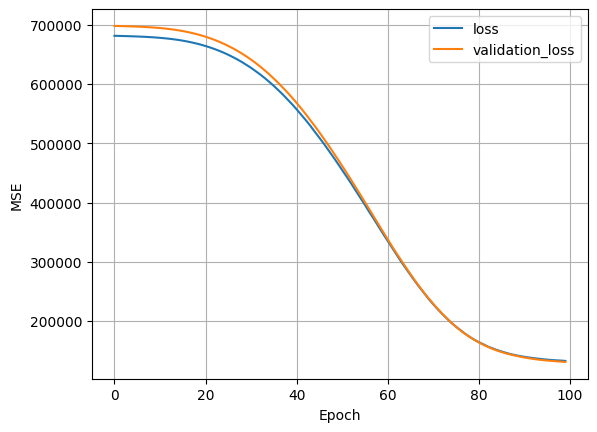

In [119]:
# Plot model results
plot_loss_mse(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


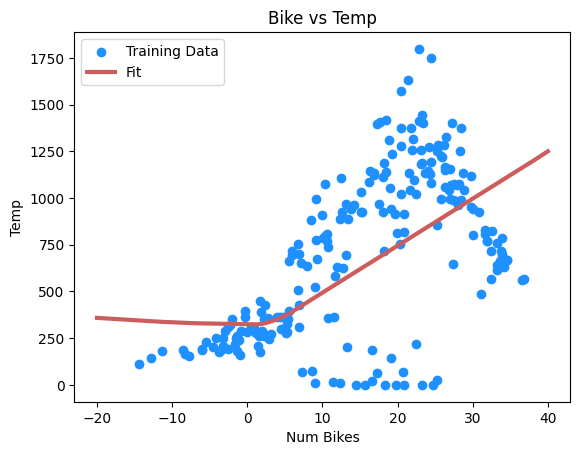

In [120]:
# Plot training data
plt.scatter(X_train_temp, Y_train_temp, label = 'Training Data', color = 'dodgerblue')
# Generate a range of x-values to feed to a model for predicted values
x = tf.linspace(-20, 40, 100)
# Plot the predicted line of best fit
plt.plot(x, nn_linreg_full.predict(np.array(x).reshape(-1, 1)), label = 'Fit', color = 'indianred', linewidth = 3)

# Format
plt.legend()
plt.title('Bike vs Temp')
plt.ylabel('Temp')
plt.xlabel('Num Bikes')
plt.show()

Less data at the lower end makes it more difficult for the model to predict the line of best fit, and a non-linear prediction is generated.

#### **Regression w/ Full Neural Net**

In [134]:
# Create normalisation layer
all_normaliser = tf.keras.layers.Normalization(input_shape = (6,), axis = None)
all_normaliser.adapt(X_train_all)

# Initialise a neural net model
nn_linreg_full = tf.keras.Sequential([
    # Pass normaliser layer
    all_normaliser,
    # Dense layers
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Compile model
nn_linreg_full.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_squared_error')

c:\Users\roman\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [135]:
# Fit model
history = nn_linreg_full.fit(
    X_train_all, Y_train_all,
    validation_data = (X_valid_all, Y_valid_all),
    epochs = 100,
    verbose = 0
)

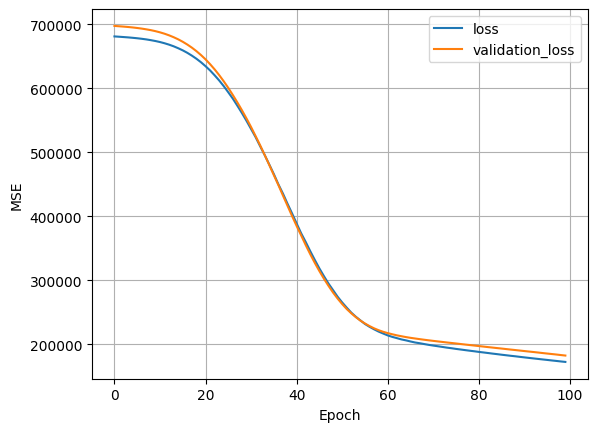

In [136]:
plot_loss_mse(history)

Compare linear regression and neural net regression via MSE:

In [137]:
# Define MSE calculation
def MSE(pred_values, real_values):
    return (np.square(pred_values - real_values)).mean()

In [138]:
# Predict values using linear regression
y_pred_lr = all_linreg.predict(X_test_all)
# Predict values using NN
y_pred_nn = nn_linreg_full.predict(X_test_all)

# Calculate MSE
print(f'Linear Regression MSE: {MSE(y_pred_lr, Y_test_all)}')
print(f'Neural Network MSE: {MSE(y_pred_nn, Y_test_all)}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Linear Regression MSE: 104858.4986620791
Neural Network MSE: 169733.91975524783


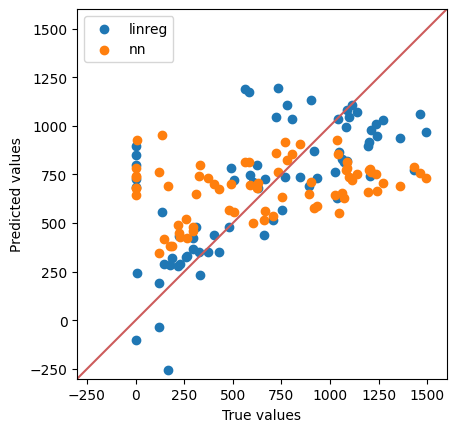

In [ ]:
# Visualise predicted vs real values
plt.axes(aspect = 'equal')
plt.scatter(Y_test_all, y_pred_lr, label = 'linreg')
plt.scatter(Y_test_all, y_pred_nn, label = 'nn')
plt.xlabel('True values')
plt.ylabel('Predicted values')

# Set limits
lims = [-300, 1600]
plt.legend()
plt.xlim(lims)
plt.ylim(lims)
# Plot 1:1 line
plt.plot(lims, lims, c = 'indianred')

## Unsupervised Learning

### Seeds Dataset

Can the type of seed be predicted using high-dimensional data?

In [164]:
# Import data
df = pd.read_csv('seeds_dataset.txt', sep = '\s+', header = None)
# Define columns
cols =  ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove', 'class']
# Set columns
df.columns = cols
# Show data
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


#### **Visualise**

In [ ]:
for i in range(len(cols) - 1):
    for j in range(i + 1, len(cols) - 1):
        x_label = cols[i]
        y_label = cols[j]
        sns.scatterplot(x = x_label, y = y_label, data = df, hue = 'class')
        plt.show()

### K-means clustering

Here, we attempt to compute $k$ clusters from some scattered data, where $k$ is pre-defined.

#### **Computing clusters**

How does the computer define clusters from a given $k$?

1. $k$ random points are chosen to be centroids of given number of clusters.
2. The distance for each point to each centroid is calculated, assigning each point to the closest centroid.
3. Compute new centroids, based on average coordinates within the now defined clusters.
4. Steps 2/3 repeat, until iteration converges and no points change between clusters with new computation.

This is knowns as **Expectation-Maximization**.

New points introduced to the data can be mapped into the space, and assigned a high-probability cluster based on the distance to the closest centroid/cluster.

#### **Low dimensional K-means**

How effective is clustering taking only 2 dimensions?

In [ ]:
# Define chosen features
x1 = 'perimeter'
x2 = 'asymmetry'
# Extract values for chosen features
X = df[[x1, x2]].values

In [ ]:
# Fit KMeans model w/ defined clusters
kmeans = KMeans(n_clusters = 3).fit(X)

When comparing predicted and known clusters, the label assigned to each cluster may differ. This would require mapping between the sets of cluster labels.

In [171]:
# Extract list of predicted clusters
clusters_pred = kmeans.labels_
# Show data
clusters_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2], dtype=int32)

In [172]:
# Extract list of actual clusters
clusters_true = df['class'].values
# Show data
clusters_true

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

**Visualise K-means clustering**

In [175]:
# Generate dataframe
cluster_df = pd.DataFrame(np.hstack((X, clusters_pred.reshape(-1, 1))), columns = [x1, x2, 'class'])
# Show data
cluster_df.head()

,perimeter,asymmetry,class
0,14.84,2.221,0.0
1,14.57,1.018,0.0
2,14.09,2.699,0.0
3,13.94,2.259,0.0
4,14.99,1.355,0.0


<Axes: xlabel='perimeter', ylabel='asymmetry'>

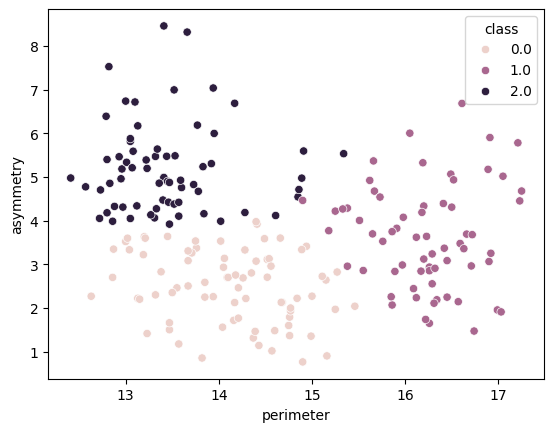

In [ ]:
# Plot K-means data
sns.scatterplot(x = x1, y = x2, hue = 'class', data = cluster_df)

<Axes: xlabel='perimeter', ylabel='asymmetry'>

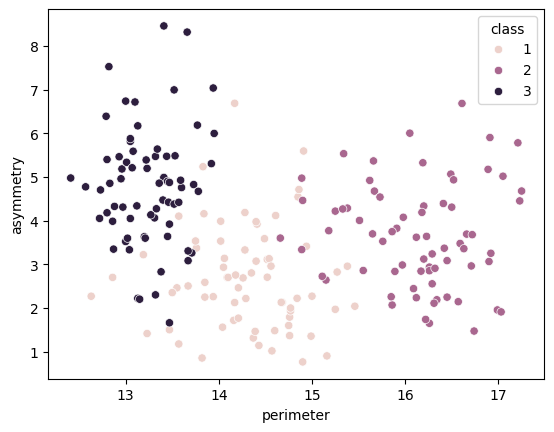

In [177]:
# Plot original data
sns.scatterplot(x = x1, y = x2, hue = 'class', data = df)

#### **High dimensional K-means**

How different is clustering when taking into account all available feature data?

In [178]:
# Take all feature data
X = df[cols[:-1]].values
# Calculate kmeans clusters
kmeans = KMeans(n_clusters = 3).fit(X)
# Extract predicted cluster data
cluster_df = pd.DataFrame(np.hstack((X, kmeans.labels_.reshape(-1,1))), columns = df.columns)
# Show data
cluster_df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,2.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,2.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,2.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,2.0


**Visualise**

<Axes: xlabel='perimeter', ylabel='asymmetry'>

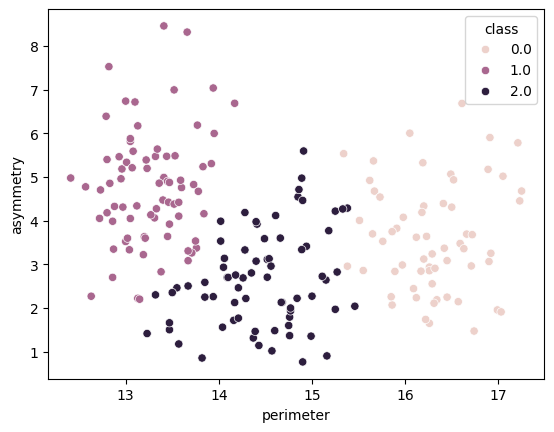

In [188]:
# Plot K-means data
sns.scatterplot(x = x1, y = x2, hue = 'class', data = cluster_df)

<Axes: xlabel='perimeter', ylabel='asymmetry'>

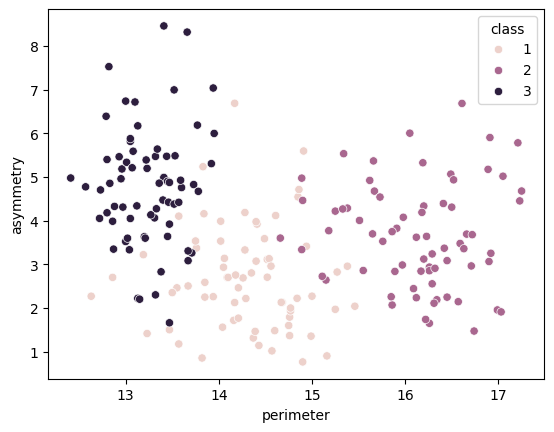

In [189]:
# Plot K-means data
sns.scatterplot(x = x1, y = x2, hue = 'class', data = df)

Using high dimensional data can be useful when clustering using 2 dimensions that seemed to have no relation e.g. compactness and asymmetry.

### Principal Component Analysis

This method is primarily used for dimensionality reduction. It attempts to find the direction in a data space with the largest variance, telling you the most about a dataset while projecting the data into lower dimensions. While capturing largest variance, it also minimises the residuals between the data points in their dimension and the projected data in the lower dimension.

#### **Implementing PCA**

Apply dimensionality reduction to dataset.

In [193]:
# Take all feature data
X = df[cols[:-1]].values
# Report shape
print(X.shape)

# Define model
pca = PCA(n_components = 2)
# Fit full dimensional data
transformed_x = pca.fit_transform(X)
# Report shape
print(transformed_x.shape)

(210, 7)
(210, 2)


**Visualise**

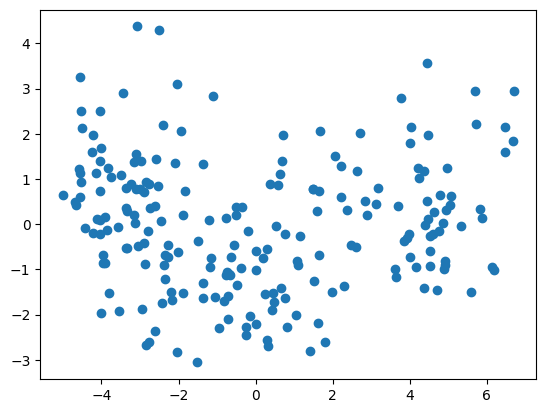

In [197]:
# Plot data
plt.scatter(x = transformed_x[:,0], y = transformed_x[:,1])

In [198]:
# Apply clustering labels on PCA derived data
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1,1))), columns = ['pca1', 'pca2', 'class'])
# Show data
kmeans_pca_df.head()

,pca1,pca2,class
0,0.663448,-1.417321,2.0
1,0.315667,-2.689229,2.0
2,-0.660499,-1.131506,2.0
3,-1.055276,-1.621190,2.0
4,1.619999,-2.183384,2.0


In [200]:
# Apply true clusters on PCA derived data
true_pca_df = pd.DataFrame(np.hstack((transformed_x, df['class'].values.reshape(-1,1))), columns = ['pca1', 'pca2', 'class'])
# Show data
true_pca_df.head()

,pca1,pca2,class
0,0.663448,-1.417321,1.0
1,0.315667,-2.689229,1.0
2,-0.660499,-1.131506,1.0
3,-1.055276,-1.621190,1.0
4,1.619999,-2.183384,1.0


<Axes: xlabel='pca1', ylabel='pca2'>

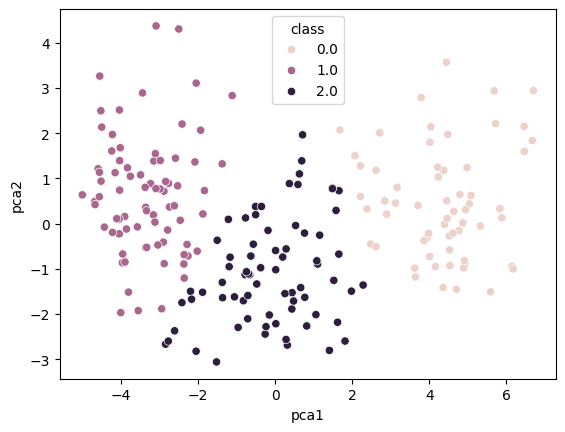

In [ ]:
# Plot kmeans data
sns.scatterplot(kmeans_pca_df, x = 'pca1', y = 'pca2', hue = 'class')

<Axes: xlabel='pca1', ylabel='pca2'>

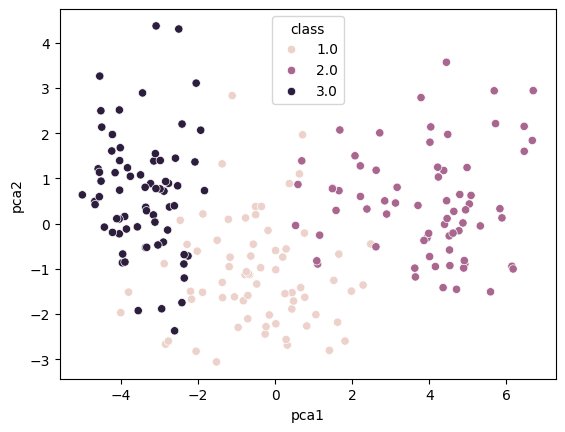

In [201]:
# Plot true data
sns.scatterplot(true_pca_df, x = 'pca1', y = 'pca2', hue = 'class')